In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Load and Explore the Dataset

In [3]:
df = pd.read_csv('IRIS -1.csv')

In [8]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [9]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [12]:
df.shape

(150, 5)

### Data Visualization

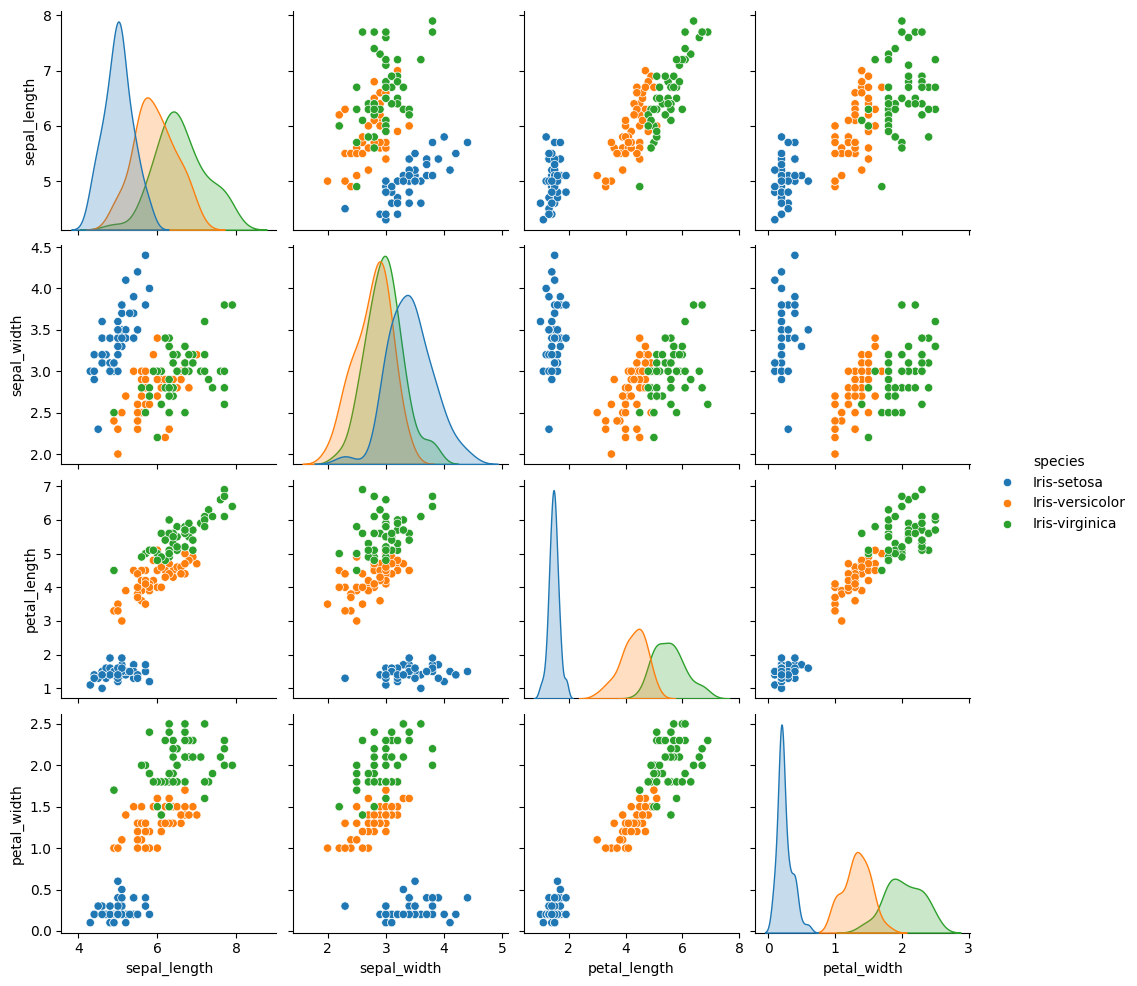

In [14]:
# Pairplot to visualize the data
sns.pairplot(df, hue='species')
plt.show()

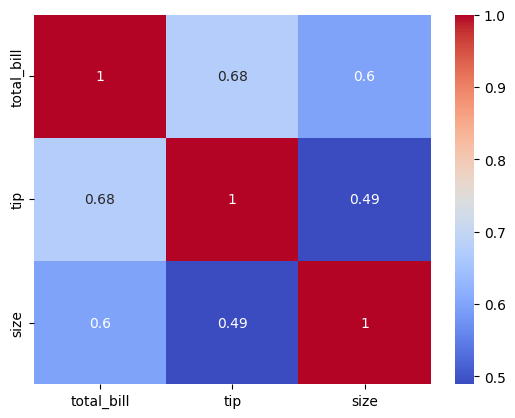

In [21]:
# Correlation matrix heatmap using seaborn's tips dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Select only the numeric columns
numeric_df = tips.select_dtypes(include=['int64', 'float64'])

# Generate the correlation matrix heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


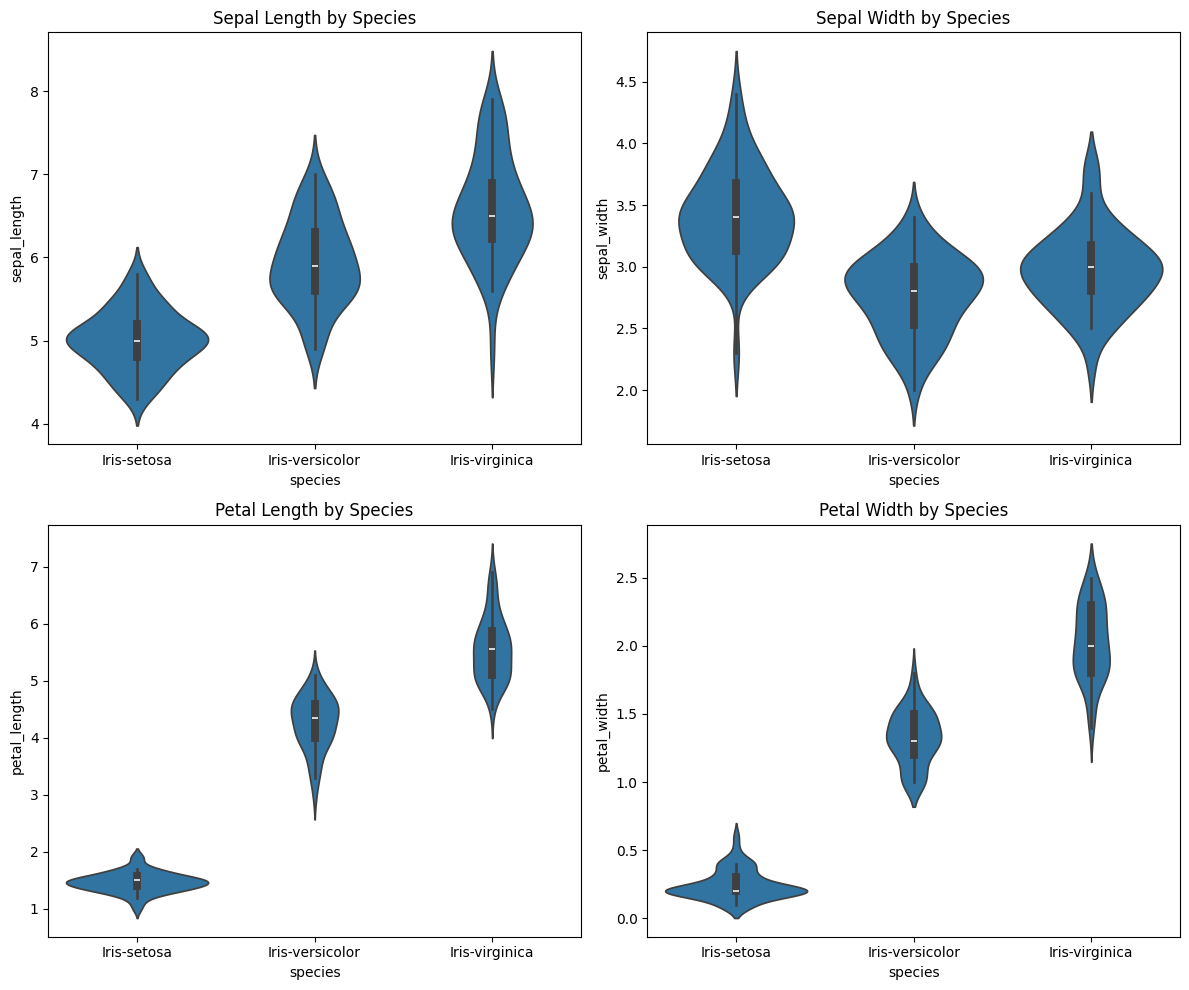

In [23]:
# Violin plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=df)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


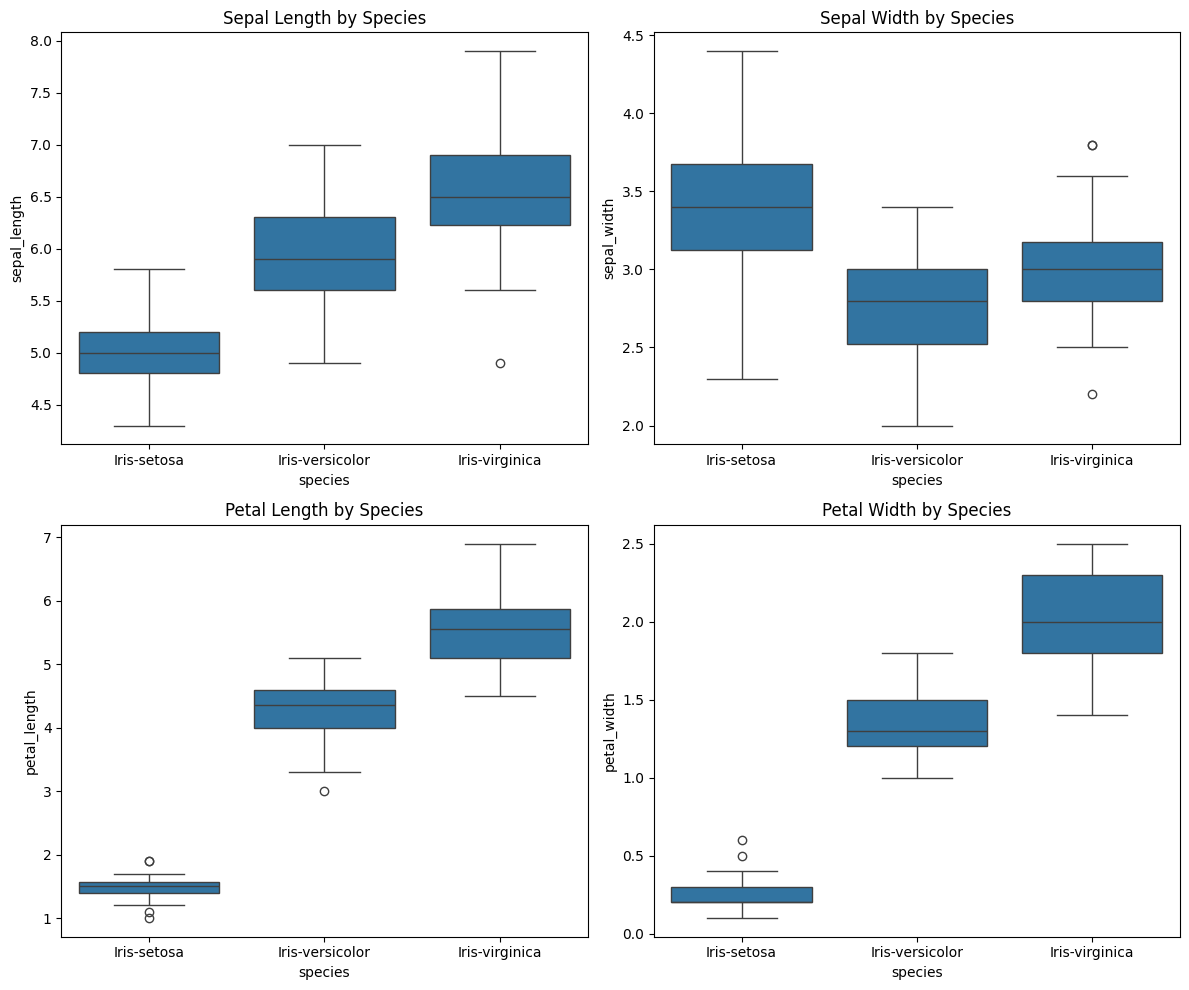

In [24]:
# Box plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


C:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


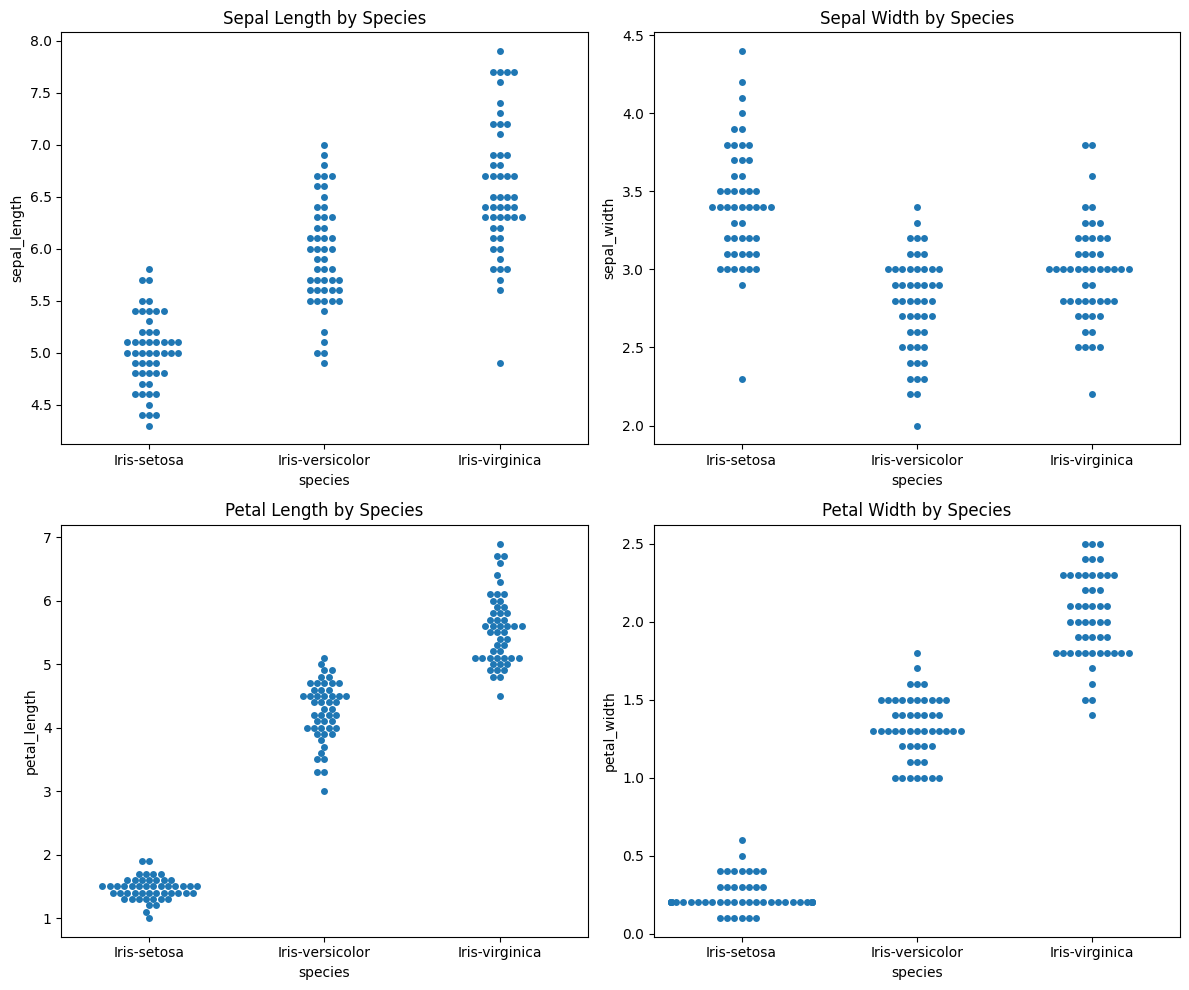

In [27]:
# Swarm plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.swarmplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.swarmplot(x='species', y='sepal_width', data=df)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.swarmplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.swarmplot(x='species', y='petal_width', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


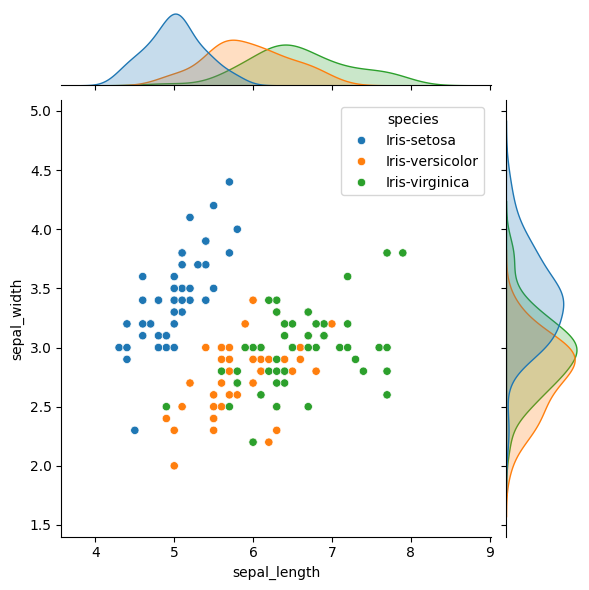

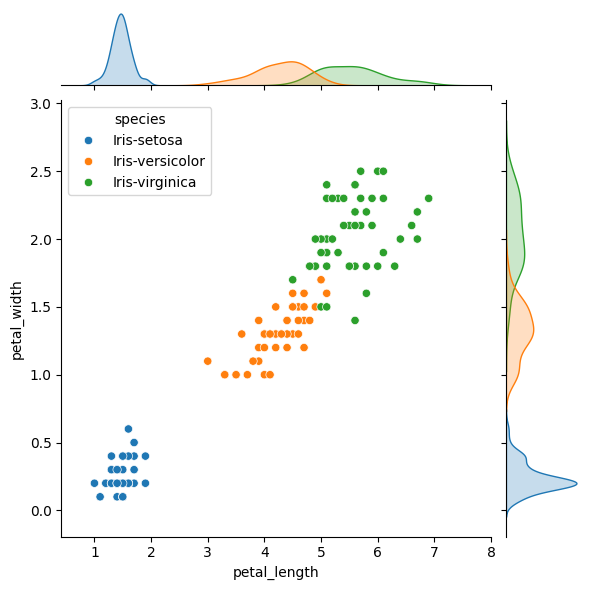

In [29]:
# Joint plots
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind='scatter', hue='species')
plt.show()

sns.jointplot(x='petal_length', y='petal_width', data=df, kind='scatter', hue='species')
plt.show()


### Data Preprocessing

In [30]:
X = df.drop('species', axis=1)
y = df['species']

In [31]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [51]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Check the mean and standard deviation of X_train
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

print("X_train mean:", X_train_mean)
print("X_train standard deviation:", X_train_std)

# Check the mean and standard deviation of X_test
X_test_mean = np.mean(X_test, axis=0)
X_test_std = np.std(X_test, axis=0)

print("X_test mean:", X_test_mean)
print("X_test standard deviation:", X_test_std)

X_train mean: [6.51330841e-16 7.54951657e-16 1.92438658e-16 1.44328993e-16]
X_train standard deviation: [1. 1. 1. 1.]
X_test mean: [ 0.20824055 -0.03936707  0.08935704  0.10773529]
X_test standard deviation: [1.01274741 0.85087216 1.03808382 1.06262107]


### Train the Model

In [55]:
# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluate the Model

In [58]:
y_pred = knn.predict(X_test)

In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [64]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [65]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
1.0


### Visualize Model Performance

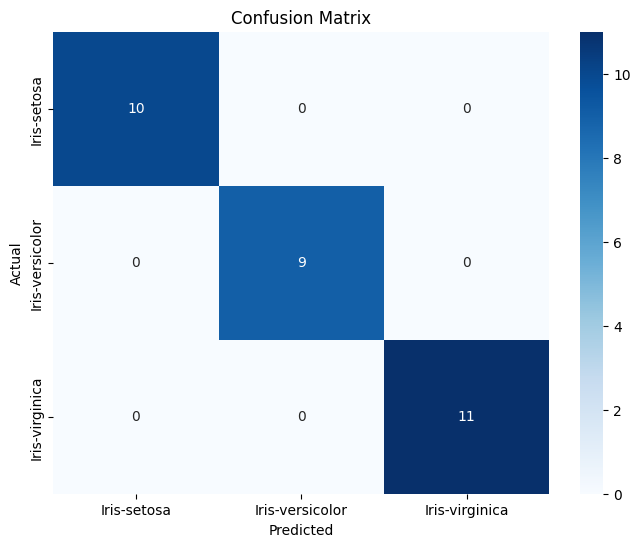

In [66]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Test

In [69]:
# Define new data points
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.0, 6.9], 
    'sepal_width': [3.5, 2.2, 3.1], 
    'petal_length': [1.4, 4.0, 5.4], 
    'petal_width': [0.2, 1.0, 2.1]
})

# Standardize the new data points using the same scaler
new_data_scaled = scaler.transform(new_data)

In [70]:
# Make predictions on the new data points
predictions = knn.predict(new_data_scaled)

# Output the predictions
print("Predicted species for the new data points:")
for i, prediction in enumerate(predictions):
    print(f"Data point {i+1}: {prediction}")

Predicted species for the new data points:
Data point 1: Iris-setosa
Data point 2: Iris-versicolor
Data point 3: Iris-virginica
